**Name:** Pratik Supe <br>**Roll No.**54  <br> **Div:** B

In [ ]:
!rm -rf colorization
!pip install --upgrade torch torchvision scikit-image opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!git clone --depth 1 https://github.com/richzhang/colorization.git
%cd colorization

Cloning into 'colorization'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 1), reused 15 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 4.46 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/colorization


In [ ]:
!mkdir -p models
!wget https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v2-9b330a0b.pth -O models/colorization_release_v2.pth
!wget https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v1-6d696e8a.pth -O models/colorization_release_v1.pth

print("✅ Setup complete!")

--2025-04-09 10:36:39--  https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v2-9b330a0b.pth
Resolving colorizers.s3.us-east-2.amazonaws.com (colorizers.s3.us-east-2.amazonaws.com)... 3.5.130.150, 3.5.131.199, 3.5.128.26, ...
Connecting to colorizers.s3.us-east-2.amazonaws.com (colorizers.s3.us-east-2.amazonaws.com)|3.5.130.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128976165 (123M) [application/x-www-form-urlencoded]
Saving to: ‘models/colorization_release_v2.pth’

models/colorization 100%[===================>] 123.00M  38.6MB/s    in 3.2s    

2025-04-09 10:36:43 (38.6 MB/s) - ‘models/colorization_release_v2.pth’ saved [128976165/128976165]

--2025-04-09 10:36:43--  https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v1-6d696e8a.pth
Resolving colorizers.s3.us-east-2.amazonaws.com (colorizers.s3.us-east-2.amazonaws.com)... 3.5.130.150, 3.5.131.199, 3.5.128.26, ...
Connecting to colorizers.s3.us-east-2.amazonaws.com (colo

Saving baw.jpg to baw.jpg
✅ Uploaded: baw.jpg


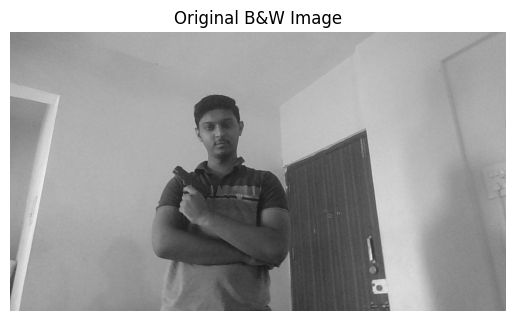

In [ ]:
# Upload B&W Image
from google.colab import files
import os

uploaded = files.upload()
baw = next(iter(uploaded))
os.rename(baw, f"imgs/{baw}")
print(f"✅ Uploaded: {baw}")

# Show original image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(f"imgs/{baw}")
plt.imshow(img)
plt.title('Original B&W Image')
plt.axis('off')
plt.show()

✅ Models loaded successfully!


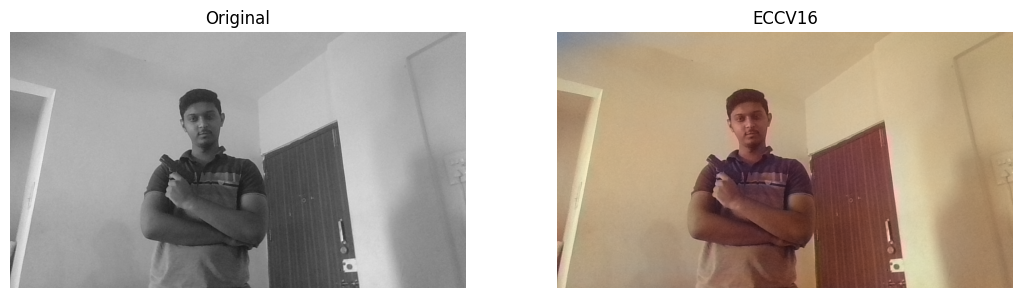

In [ ]:
# Colorize Image
import sys
sys.path.append('.')
from colorizers import *
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


try:
    colorizer_eccv16 = eccv16(pretrained=True).to(device).eval()
    colorizer_siggraph17 = siggraph17(pretrained=True).to(device).eval()
    print("✅ Models loaded successfully!")
except Exception as e:
    print(f"❌ Error loading models: {e}")
    raise

# Process image
def process_image(img_path):
    img = load_img(img_path)
    (tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))
    tens_l_rs = tens_l_rs.to(device)


    with torch.no_grad():
        out_img_eccv16 = postprocess_tens(tens_l_orig,
                                        colorizer_eccv16(tens_l_rs).cpu())
        out_img_siggraph17 = postprocess_tens(tens_l_orig,
                                           colorizer_siggraph17(tens_l_rs).cpu())
    return out_img_eccv16, out_img_siggraph17

# Run colorization
eccv16_result, siggraph17_result = process_image(f"imgs/{baw}")

# Display results
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(eccv16_result)
plt.title('ECCV16')
plt.axis('off')



plt.show()